# Data Description
Master thesis of Nikolai Popov, MAE-2025

In [1]:
# Libraries import
import pandas as pd # dataframes
import numpy as np # for matrices/vectors
from tqdm import tqdm # for progress bar
import warnings # to supress warninings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt # for graphs
import seaborn as sns # for graphs
import geopandas as gpd # to modify data for QGIS analysis
from shapely.geometry import Point # to modify data for QGIS analysis

In [2]:
balanced_df = pd.read_csv("C:/Users/Popov/Documents/Research/Volchkova_thesis/Data/Cleaned_datasets/balanced_dataset_file_collab.csv", 
                          sep=",", on_bad_lines="skip", low_memory=False)
balanced_df.head(3)

,INN,Year,okveds,coord,Capital,Labor,Output,Post_d,Treated_d
0,2435000715,2011,"['01.11', '01.11', '01.41', '01.42', '01.61', ...","56.552422, 93.047783",196517000.0,527,94216000.0,0,1
1,2435000715,2012,"['01.11', '01.11', '01.41', '01.42', '01.61', ...","56.552422, 93.047783",256296000.0,540,157125000.0,0,1
2,2435000715,2013,"['01.11', '01.11', '01.41', '01.42', '01.61', ...","56.552422, 93.047783",240583000.0,529,132336000.0,0,1


## Descriptive statistics

In [3]:
# Convert Capital and Output to millions
summary_stats = balanced_df[['Capital', 'Labor', 'Output', 'Treated_d']].copy()
summary_stats[['Capital', 'Output']] /= 1_000_000  # Convert to millions

# Compute summary statistics and drop the "count" row
summary_stats = summary_stats.describe().drop(index="count")

# Append the number of observations as the last row
summary_stats.loc["Number of observations"] = [len(balanced_df)] * summary_stats.shape[1]

# Convert summary stats to LaTeX (now including observations in the table)
latex_table = summary_stats.to_latex(
    float_format="%.2f",  # Format numbers with 2 decimal places
    caption="Summary Statistics (Millions of RUB)", 
    label="tab:summary",
    column_format="lcccc"
)

# Save to a .tex file
output_dir = "C:/Users/Popov/Documents/Research/Volchkova_thesis/Output"
summary_stats_dir = f"{output_dir}/summary_stats.tex"

with open(summary_stats_dir, "w") as f:
    f.write(latex_table)

# Print LaTeX output
print(latex_table)

\begin{table}
\caption{Summary Statistics (Millions of RUB)}
\label{tab:summary}
\begin{tabular}{lcccc}
\toprule
 & Capital & Labor & Output & Treated_d \\
\midrule
mean & 197.78 & 154.49 & 492.56 & 0.77 \\
std & 826.22 & 320.26 & 2594.79 & 0.42 \\
min & 0.00 & 1.00 & 0.00 & 0.00 \\
25% & 9.14 & 36.00 & 15.61 & 1.00 \\
50% & 41.21 & 64.00 & 69.59 & 1.00 \\
75% & 125.61 & 155.00 & 247.12 & 1.00 \\
max & 36044.92 & 21634.00 & 141109.00 & 1.00 \\
Number of observations & 50952.00 & 50952.00 & 50952.00 & 50952.00 \\
\bottomrule
\end{tabular}
\end{table}



## Distributions

### Capital

For log of capital:

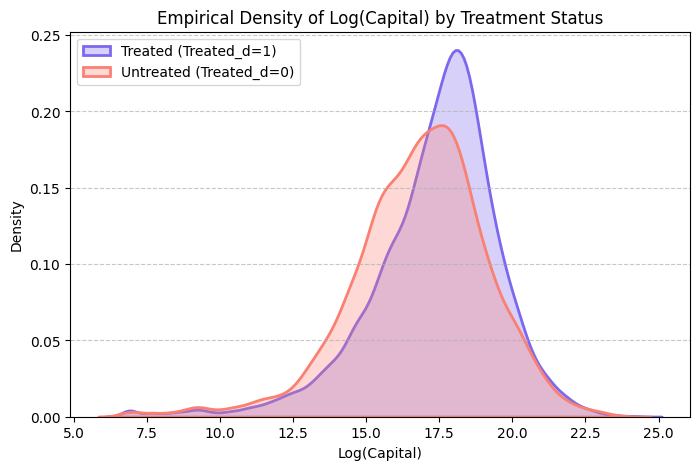

In [4]:
# Define log-transformed capital for treated and untreated groups
log_capital_treated = np.log(balanced_df.loc[balanced_df['Treated_d'] == 1, 'Capital'])
log_capital_untreated = np.log(balanced_df.loc[balanced_df['Treated_d'] == 0, 'Capital'])

# Create the plot
plt.figure(figsize=(8, 5))

# Plot smooth KDE (Kernel Density Estimation) for treated and untreated groups
sns.kdeplot(log_capital_treated, color='mediumslateblue', linewidth=2, label='Treated (Treated_d=1)', fill=True, alpha=0.3)
sns.kdeplot(log_capital_untreated, color='salmon', linewidth=2, label='Untreated (Treated_d=0)', fill=True, alpha=0.3)

# Labels and title
plt.xlabel("Log(Capital)")
plt.ylabel("Density")  # Since area under curve sums to 1
plt.title("Empirical Density of Log(Capital) by Treatment Status")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image file
image_path = f"{output_dir}/log_capital_pdf.png"
plt.savefig(image_path, dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()


### Labor

For log labor:

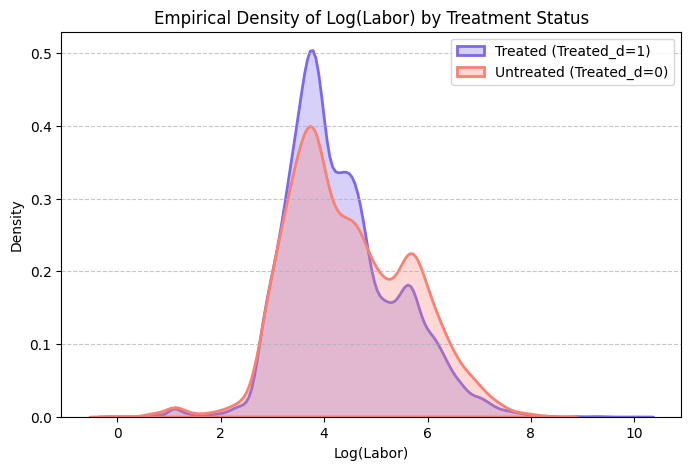

In [5]:
# Define log-transformed labor for treated and untreated groups
log_labor_treated = np.log(balanced_df.loc[balanced_df['Treated_d'] == 1, 'Labor'])
log_labor_untreated = np.log(balanced_df.loc[balanced_df['Treated_d'] == 0, 'Labor'])

# Create the plot
plt.figure(figsize=(8, 5))

# Plot smooth KDE for treated and untreated groups
sns.kdeplot(log_labor_treated, color='mediumslateblue', linewidth=2, label='Treated (Treated_d=1)', fill=True, alpha=0.3)
sns.kdeplot(log_labor_untreated, color='salmon', linewidth=2, label='Untreated (Treated_d=0)', fill=True, alpha=0.3)

# Labels and title
plt.xlabel("Log(Labor)")
plt.ylabel("Density")
plt.title("Empirical Density of Log(Labor) by Treatment Status")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
image_path = f"{output_dir}/log_labor_pdf.png"
plt.savefig(image_path, dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()

### Output

For log of Output:

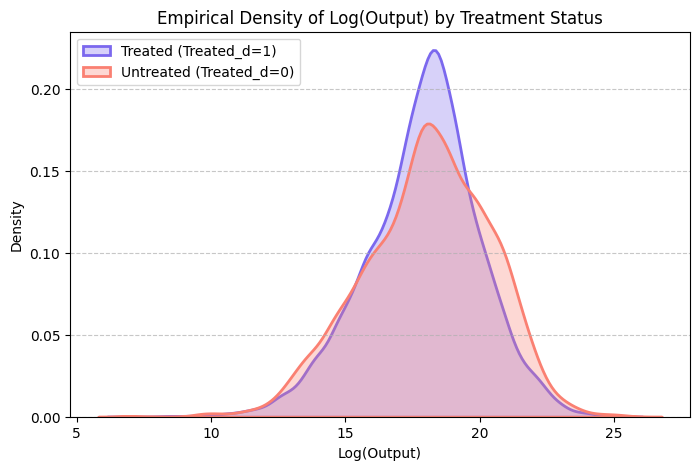

In [6]:
# Define log-transformed output for treated and untreated groups
log_output_treated = np.log(balanced_df.loc[balanced_df['Treated_d'] == 1, 'Output'])
log_output_untreated = np.log(balanced_df.loc[balanced_df['Treated_d'] == 0, 'Output'])

# Create the plot
plt.figure(figsize=(8, 5))

# Plot smooth Kernel Density Estimation (KDE) for treated and untreated groups
sns.kdeplot(log_output_treated, color='mediumslateblue', linewidth=2, label='Treated (Treated_d=1)', fill=True, alpha=0.3)
sns.kdeplot(log_output_untreated, color='salmon', linewidth=2, label='Untreated (Treated_d=0)', fill=True, alpha=0.3)

# Labels and title
plt.xlabel("Log(Output)")
plt.ylabel("Density")  # Since area under curve sums to 1
plt.title("Empirical Density of Log(Output) by Treatment Status")
plt.legend(loc='upper left', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a high-quality image file
image_path = f"{output_dir}/log_output_smooth_pdf.png"
plt.savefig(image_path, dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()

## Time Trends

### Capital

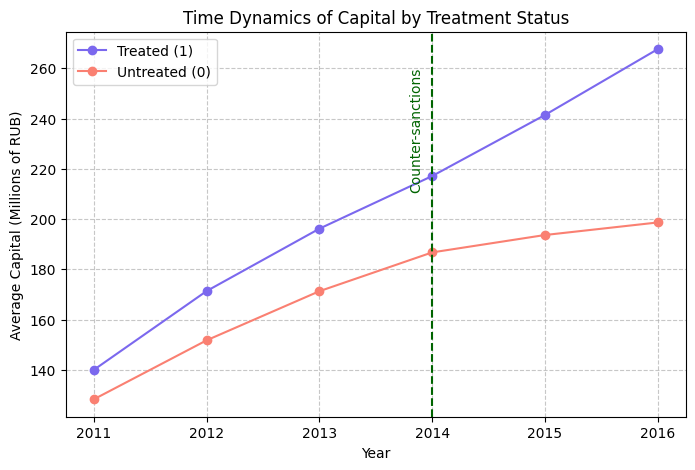

In [7]:
# Group data by year and treatment status, computing mean Capital (converted to millions)
capital_dynamics = balanced_df.groupby(['Year', 'Treated_d'])['Capital'].mean().reset_index()
capital_dynamics['Capital'] /= 1_000_000  # Convert to millions of RUB

# Create the plot
plt.figure(figsize=(8, 5))

# Define color mapping
colors = {1: 'mediumslateblue', 0: 'salmon'}

# Plot treated group
treated_plot, = plt.plot(capital_dynamics[capital_dynamics['Treated_d'] == 1]['Year'],
                         capital_dynamics[capital_dynamics['Treated_d'] == 1]['Capital'],
                         color=colors[1], marker='o', linestyle='-', label='Treated (1)')

# Plot untreated group
untreated_plot, = plt.plot(capital_dynamics[capital_dynamics['Treated_d'] == 0]['Year'],
                           capital_dynamics[capital_dynamics['Treated_d'] == 0]['Capital'],
                           color=colors[0], marker='o', linestyle='-', label='Untreated (0)')

# Add vertical dashed line for 2014 in dark green
plt.axvline(x=2014, color='darkgreen', linestyle='--', linewidth=1.5)

# Add rotated text label to the left of the line
plt.text(2013.8, capital_dynamics['Capital'].max() * 0.88, "Counter-sanctions", 
         rotation=90, verticalalignment='center', fontsize=10, color='darkgreen')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Capital (Millions of RUB)")
plt.title("Time Dynamics of Capital by Treatment Status")
plt.grid(True, linestyle='--', alpha=0.7)

# Fix legend (remove title)
plt.legend(handles=[treated_plot, untreated_plot])  # No title

# Save the plot
image_path = f"{output_dir}/capital_time_dynamics.png"
plt.savefig(image_path, dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()

### Labor

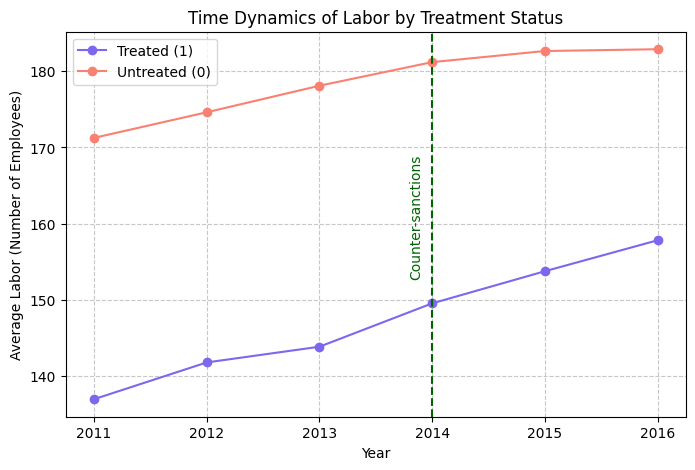

In [8]:
# Group data by year and treatment status, computing mean Labor
labor_dynamics = balanced_df.groupby(['Year', 'Treated_d'])['Labor'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 5))

# Define color mapping
colors = {1: 'mediumslateblue', 0: 'salmon'}

# Plot treated group
treated_plot, = plt.plot(labor_dynamics[labor_dynamics['Treated_d'] == 1]['Year'],
                         labor_dynamics[labor_dynamics['Treated_d'] == 1]['Labor'],
                         color=colors[1], marker='o', linestyle='-', label='Treated (1)')

# Plot untreated group
untreated_plot, = plt.plot(labor_dynamics[labor_dynamics['Treated_d'] == 0]['Year'],
                           labor_dynamics[labor_dynamics['Treated_d'] == 0]['Labor'],
                           color=colors[0], marker='o', linestyle='-', label='Untreated (0)')

# Add vertical dashed line for 2014 in dark green
plt.axvline(x=2014, color='darkgreen', linestyle='--', linewidth=1.5)

# Add rotated text label to the left of the line
plt.text(2013.8, labor_dynamics['Labor'].max() * 0.88, "Counter-sanctions", 
         rotation=90, verticalalignment='center', fontsize=10, color='darkgreen')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Labor (Number of Employees)")
plt.title("Time Dynamics of Labor by Treatment Status")
plt.grid(True, linestyle='--', alpha=0.7)

# Fix legend (remove title)
plt.legend(handles=[treated_plot, untreated_plot])

# Save the plot
image_path = f"{output_dir}/labor_time_dynamics.png"
plt.savefig(image_path, dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()

### Output

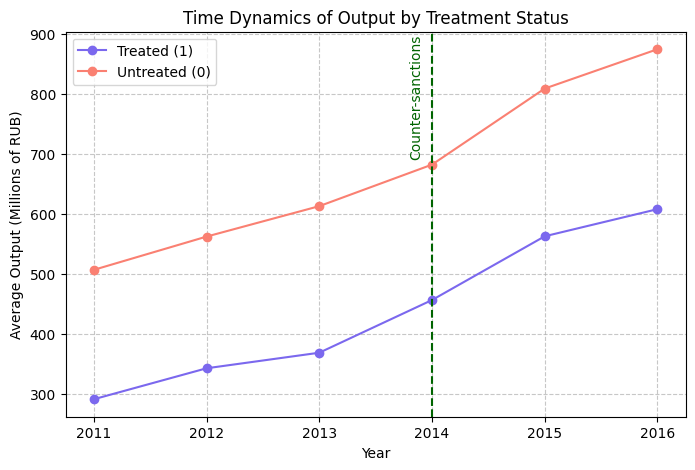

In [9]:
# Group data by year and treatment status, computing mean Output (converted to millions)
output_dynamics = balanced_df.groupby(['Year', 'Treated_d'])['Output'].mean().reset_index()
output_dynamics['Output'] /= 1_000_000  # Convert to millions of RUB

# Create the plot
plt.figure(figsize=(8, 5))

# Define color mapping
colors = {1: 'mediumslateblue', 0: 'salmon'}

# Plot treated group
treated_plot, = plt.plot(output_dynamics[output_dynamics['Treated_d'] == 1]['Year'],
                         output_dynamics[output_dynamics['Treated_d'] == 1]['Output'],
                         color=colors[1], marker='o', linestyle='-', label='Treated (1)')

# Plot untreated group
untreated_plot, = plt.plot(output_dynamics[output_dynamics['Treated_d'] == 0]['Year'],
                           output_dynamics[output_dynamics['Treated_d'] == 0]['Output'],
                           color=colors[0], marker='o', linestyle='-', label='Untreated (0)')

# Add vertical dashed line for 2014 in dark green
plt.axvline(x=2014, color='darkgreen', linestyle='--', linewidth=1.5)

# Add rotated text label to the left of the line
plt.text(2013.8, output_dynamics['Output'].max() * 0.91, "Counter-sanctions", 
         rotation=90, verticalalignment='center', fontsize=10, color='darkgreen')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Output (Millions of RUB)")
plt.title("Time Dynamics of Output by Treatment Status")
plt.grid(True, linestyle='--', alpha=0.7)

# Fix legend (remove title)
plt.legend(handles=[treated_plot, untreated_plot])  # No title

# Save the plot
image_path = f"{output_dir}/output_time_dynamics.png"
plt.savefig(image_path, dpi=1000, bbox_inches='tight')

# Show the plot
plt.show()


# Data preparation for QGIS

In [10]:
# Use your existing DataFrame (balanced_df)
df_geo = balanced_df.copy()

# As coordinates were preliminary checked to be the same throughout the years,
# let's keep only the observations for 2014, thus reducing the number of points in 7 times
df_geo = df_geo[(df_geo["Year"] == 2014)]

# Step 1: Split 'coord' column into separate 'Latitude' and 'Longitude'
df_geo[['Latitude', 'Longitude']] = df_geo['coord'].str.split(', ', expand=True).astype(float)

# Step 2: Drop old 'coord' column
df_geo.drop(columns=['coord'], inplace=True)

# Step 3: Save as a CSV file for QGIS (can be imported as point layer)
df_geo_path = "C:/Users/Popov/Documents/Research/Volchkova_thesis/Data/GEO/firms_qgis_points.csv"
df_geo.to_csv(df_geo_path, index=False)

print("Files saved: firms_qgis.csv (for QGIS point layer)")


Files saved: firms_qgis.csv (for QGIS point layer)
